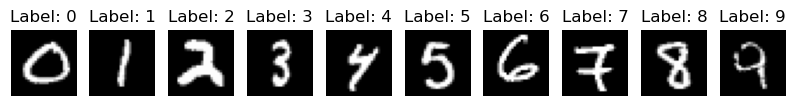

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

np.random.seed(42)

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

subset_X = []
subset_y = []

for i in range(10):
    class_indices = np.where(y == i)[0]
    selected_indices = np.random.choice(class_indices, 1000, replace=False)
    subset_X.append(X[selected_indices])
    subset_y.append(y[selected_indices])

subset_X = np.concatenate(subset_X)
subset_y = np.concatenate(subset_y)

plt.figure(figsize=(10, 2))
for i in range(10):
    class_indices = np.where(subset_y == i)[0]
    random_index = np.random.choice(class_indices)
    plt.subplot(1, 10, i + 1)
    plt.imshow(subset_X[random_index].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {i}")
    plt.axis("off")
plt.show()

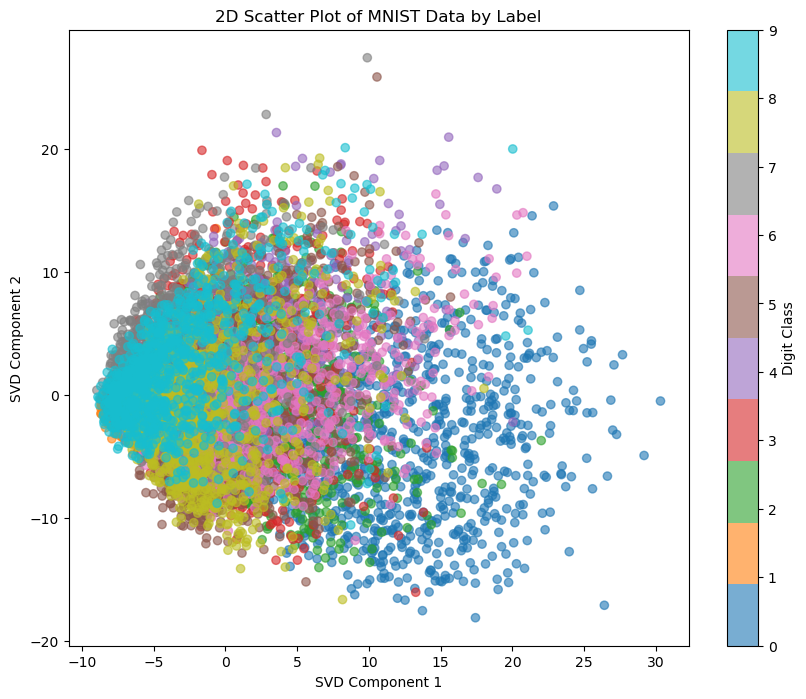

In [3]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(subset_X)

svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_normalized)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=subset_y, cmap="tab10", alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label="Digit Class")
plt.title("2D Scatter Plot of MNIST Data by Label")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

In [5]:
# Custom K-Means Model
def kmeans_display(X, label):
    unique_labels = np.unique(label)
    markers = ['b^', 'go', 'rs', 'c*', 'mD', 'y+', 'kx', 'bp', 'g<', 'r>']
    
    plt.figure(figsize=(10, 8))
    for i, lbl in enumerate(unique_labels):
        cluster_data = X[label == lbl, :]
        plt.plot(cluster_data[:, 0], cluster_data[:, 1], markers[i], markersize=4, alpha=0.8)
    plt.axis('equal')
    plt.show()

def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by Custom K-Means Model:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Converged in 170 iterations.


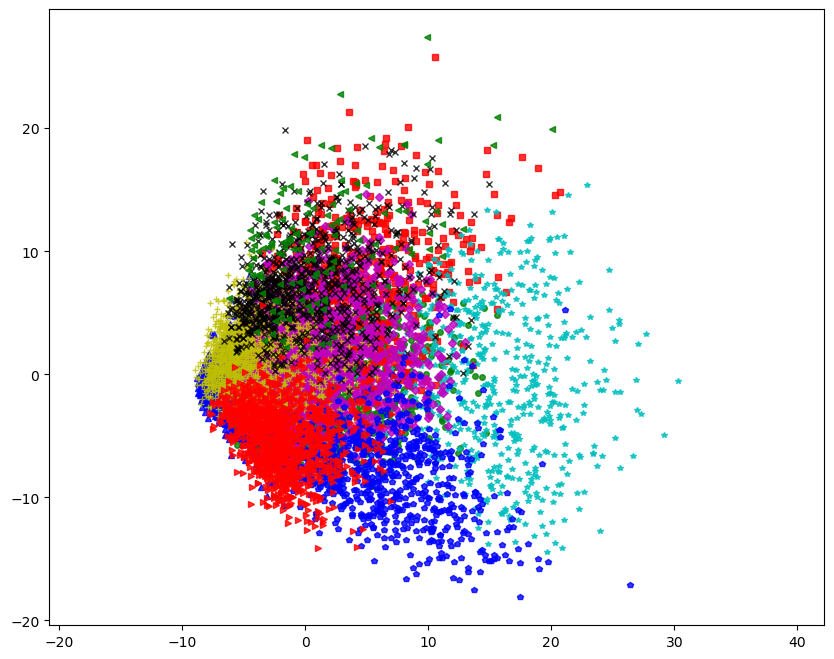

In [7]:
K = 10
centers, labels, it = kmeans(X_normalized, K)

print('Centers found by Custom K-Means Model:')
print(centers[-1])
print(f"Converged in {it} iterations.")

kmeans_display(X_2d, labels[-1])

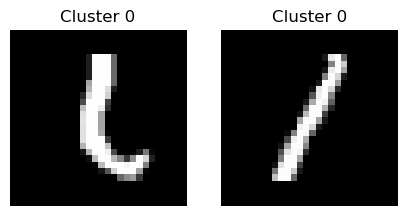

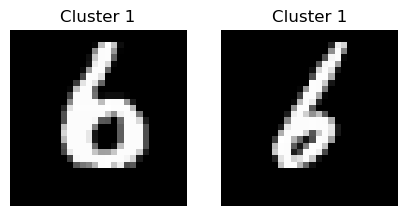

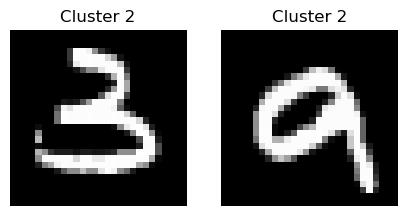

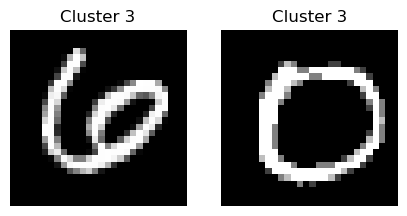

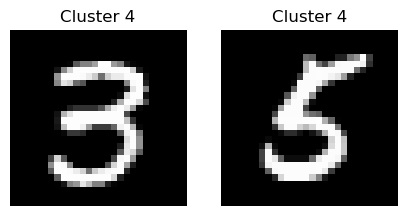

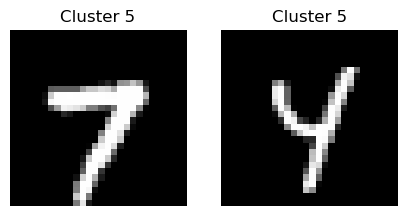

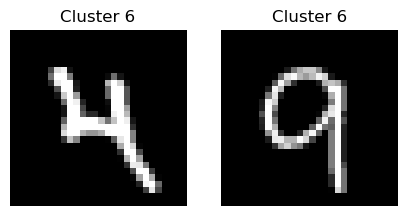

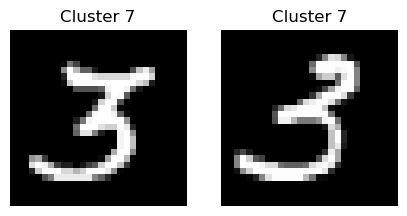

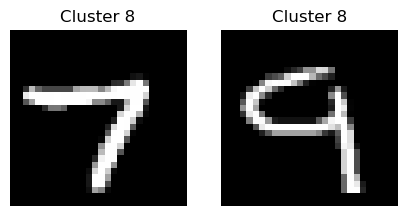

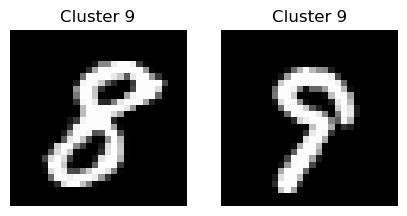

In [8]:
for i in range(K):
    cluster_indices = np.where(labels[-1] == i)[0]
    sample_indices = np.random.choice(cluster_indices, 2, replace=False)
    
    fig, axs = plt.subplots(1, 2, figsize=(5, 5))
    for j, idx in enumerate(sample_indices):
        axs[j].imshow(subset_X[idx].reshape(28, 28), cmap='gray')
        axs[j].axis('off')
        axs[j].set_title(f"Cluster {i}")
    plt.show()